In [1]:
# EJERCICIO N°1: Provincias del Perú

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import os

# tabla de datos con indicadores recopilados en "indicadoresPeru"
datadistacias = pd.read_excel(os.path.join('data','indicadoresPeru.xlsx'), dtype={'Ubigeo': object})
datadistacias.head()

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,ICP2017,Educ_Sup_incomp2019_pct,NB_comp2017_pct,Viv_Sin_ap2017_pct
0,010202,Amazonas,Bagua,ARAMANGO,10940,0.264900,62.454115,37.1,9.8
1,010201,Amazonas,Bagua,BAGUA,26091,0.186602,29.204499,74.6,1.4
2,010203,Amazonas,Bagua,COPALLIN,6319,0.220810,47.428639,54.6,2.8
3,010204,Amazonas,Bagua,EL PARCO,1492,0.213505,29.784591,40.1,2.2
4,010305,Amazonas,Bongara,CUISPES,899,0.299737,62.558563,58.9,8.3


In [4]:
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

# mapa con las provincias y distritos del Perú, nosotros trabajaremos con las provincias
datadistaciasmap = gpd.read_file(os.path.join('maps','DistritosMap.zip'))
datadistaciasmap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [5]:
# creamos una función que transforme el contenido de las columnas seleccionadas en mayúsculas --> str.upper()
# también eliminar los espacios en blanco al principio y al final de cada valor --> str.strip()
mayusColumnas = lambda x: x.str.upper().str.strip()

datadistacias[['Departamento','Provincia']] = datadistacias[['Departamento','Provincia']].apply(mayusColumnas)
datadistaciasmap[['DEPARTAMEN','PROVINCIA']] = datadistaciasmap[['DEPARTAMEN','PROVINCIA']].apply(mayusColumnas)

In [6]:
import unidecode

# unidecode.unidecode() --> eliminar los acentos y diacríticos de los caracteres de las columnas seleccionadas con applymap
byePunctuation = lambda x: unidecode.unidecode(x)

datadistacias[['Departamento','Provincia']] = datadistacias[['Departamento','Provincia']].applymap(byePunctuation)
datadistaciasmap[['DEPARTAMEN','PROVINCIA']] = datadistaciasmap[['DEPARTAMEN','PROVINCIA']].applymap(byePunctuation)

In [7]:
# vemos el número de elementos de las columnas "Provincia" y "PROVINCIA"
len(datadistacias.Provincia), len(datadistaciasmap.PROVINCIA)

(699, 1874)

In [8]:
# contamos el número de valores duplicados en la columna "Provincia" y "PROVINCIA" de los df
datadistacias.Provincia.duplicated().sum(),datadistaciasmap.PROVINCIA.duplicated().sum()

(513, 1678)

In [9]:
# concatenatando
datadistacias['depProv'] = ["+".join(pd) for pd in zip (datadistacias.Departamento, datadistacias.Provincia)]
datadistaciasmap['depProv'] = ["+".join(pd) for pd in zip (datadistaciasmap.DEPARTAMEN, datadistaciasmap.PROVINCIA)]

In [10]:
# la nueva columna concatenada
datadistacias['depProv'].head()

0      AMAZONAS+BAGUA
1      AMAZONAS+BAGUA
2      AMAZONAS+BAGUA
3      AMAZONAS+BAGUA
4    AMAZONAS+BONGARA
Name: depProv, dtype: object

In [11]:
# reemplazamos los guiones y espacios múltiples por un espacio simple
datadistacias.depProv = datadistacias.depProv.str.replace("\-|\_|\s+"," ",regex=True)
datadistaciasmap.depProv = datadistaciasmap.depProv.str.replace("\-|\_|\s+"," ",regex=True)

In [12]:
# vemos como quedaría la tabla combinada
datadistacias

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,ICP2017,Educ_Sup_incomp2019_pct,NB_comp2017_pct,Viv_Sin_ap2017_pct,depProv
0,010202,AMAZONAS,BAGUA,ARAMANGO,10940,0.264900,62.454115,37.1,9.8,AMAZONAS+BAGUA
1,010201,AMAZONAS,BAGUA,BAGUA,26091,0.186602,29.204499,74.6,1.4,AMAZONAS+BAGUA
2,010203,AMAZONAS,BAGUA,COPALLIN,6319,0.220810,47.428639,54.6,2.8,AMAZONAS+BAGUA
3,010204,AMAZONAS,BAGUA,EL PARCO,1492,0.213505,29.784591,40.1,2.2,AMAZONAS+BAGUA
4,010305,AMAZONAS,BONGARA,CUISPES,899,0.299737,62.558563,58.9,8.3,AMAZONAS+BONGARA
...,...,...,...,...,...,...,...,...,...,...
694,250107,UCAYALI,CORONEL PORTILLO,MANANTAY,83040,0.208512,48.581055,49.0,8.4,UCAYALI+CORONEL PORTILLO
695,250302,UCAYALI,PADRE ABAD,IRAZOLA,10830,0.252256,59.895286,40.8,17.1,UCAYALI+PADRE ABAD
696,250304,UCAYALI,PADRE ABAD,NESHUYA,8445,0.224841,54.116573,39.3,9.2,UCAYALI+PADRE ABAD
697,250301,UCAYALI,PADRE ABAD,PADRE ABAD,26614,0.218085,52.822662,53.0,13.3,UCAYALI+PADRE ABAD


In [13]:
datadistacias.depProv

0                AMAZONAS+BAGUA
1                AMAZONAS+BAGUA
2                AMAZONAS+BAGUA
3                AMAZONAS+BAGUA
4              AMAZONAS+BONGARA
                 ...           
694    UCAYALI+CORONEL PORTILLO
695          UCAYALI+PADRE ABAD
696          UCAYALI+PADRE ABAD
697          UCAYALI+PADRE ABAD
698               UCAYALI+PURUS
Name: depProv, Length: 699, dtype: object

In [14]:
datadistaciasmap.depProv

0         TACNA+TACNA
1         TACNA+TACNA
2         TACNA+TACNA
3         TACNA+TACNA
4         TACNA+TACNA
            ...      
1869        LIMA+LIMA
1870        LIMA+LIMA
1871        LIMA+LIMA
1872    CALLAO+CALLAO
1873        LIMA+LIMA
Name: depProv, Length: 1874, dtype: object

In [15]:
# proceso de "merging" --> proceso de combinar/juntar las dos tablas
nomatch_df = set(datadistacias.depProv)-set(datadistaciasmap.depProv)
nomatch_gdf = set(datadistaciasmap.depProv)-set(datadistacias.depProv)

In [16]:
len(nomatch_df), len(nomatch_gdf)

(0, 10)

In [17]:
# elija la coincidencia más cercana de nomatch_gdf para un valor en nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

# []: esto indica que ninguno de los valores en "nomatch_df" encontró una coincidencia cercana en "nomatch_gdf"

[]

In [18]:
# luego:
changes_df = {dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [19]:
# ahora, hacemos los reemplazos:
datadistacias.depProv.replace(changes_df,inplace=True)

In [20]:
# finalmente, hacemos el "merge":
datadistaciasmap = datadistaciasmap.merge(datadistacias, on='depProv')

In [21]:
# revisamos la nueva tabla "datadistanciasmap", la cual ya está con el proceso del "merge"
datadistaciasmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   DEPARTAMEN               7692 non-null   object  
 1   PROVINCIA                7692 non-null   object  
 2   DISTRITO                 7692 non-null   object  
 3   INSTITUCIO               7692 non-null   object  
 4   geometry                 7692 non-null   geometry
 5   depProv                  7692 non-null   object  
 6   Ubigeo                   7692 non-null   object  
 7   Departamento             7692 non-null   object  
 8   Provincia                7692 non-null   object  
 9   Distrito                 7692 non-null   object  
 10  Poblacion                7692 non-null   int64   
 11  ICP2017                  7692 non-null   float64 
 12  Educ_Sup_incomp2019_pct  7692 non-null   float64 
 13  NB_comp2017_pct          7692 non-null   float64 
 14  

In [22]:
# podemos deshacernos de algunas columnas, las cuales tienen los mismos nombres:
bye = ['Departamento', 'Provincia', 'Distrito','INSTITUCIO']
datadistaciasmap.drop(columns=bye,inplace=True)

# mantenemos
datadistaciasmap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,depProv,Ubigeo,Poblacion,ICP2017,Educ_Sup_incomp2019_pct,NB_comp2017_pct,Viv_Sin_ap2017_pct
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+TACNA,230102,40652,0.181971,24.463493,84.9,2.8
1,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+TACNA,230103,3338,0.191676,22.170283,84.1,4.0
2,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+TACNA,230104,39060,0.202538,24.448210,86.1,1.3
3,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+TACNA,230110,123662,0.187872,28.821611,84.2,1.5
4,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",TACNA+TACNA,230102,40652,0.181971,24.463493,84.9,2.8


In [23]:
# sin antes haber eliminado las columnas con nombres iguales, hubiera ocurrido un error al guardarlos en el geopackage
datadistaciasmap.to_file(os.path.join('maps',"dataMapasPeru.gpkg"), layer='provincias', driver="GPKG")

In [24]:
# EJERCICIO N°2:

In [25]:
# estadísticas de: ICP2017
datadistaciasmap.ICP2017.describe()

count    7692.000000
mean        0.249022
std         0.067052
min         0.138601
25%         0.196358
50%         0.236815
75%         0.289468
max         0.538717
Name: ICP2017, dtype: float64

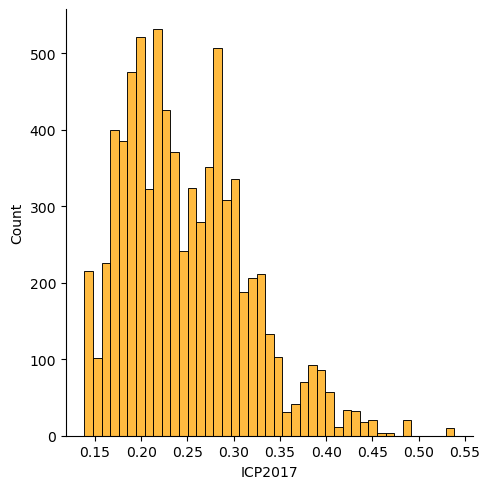

In [26]:
import seaborn as sea

sea.displot(datadistaciasmap.ICP2017, color='orange')

<Axes: >

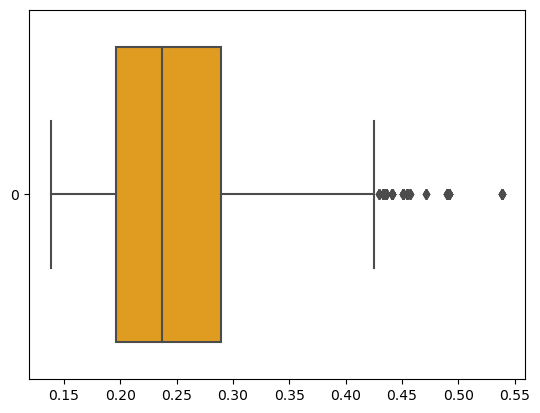

In [27]:
sea.boxplot(datadistaciasmap.ICP2017, color='orange', orient='h')

In [28]:
# para asegurarnos que los resultados sean consistentes:
import numpy as np
np.random.seed(12345)

In [29]:
import mapclassify 

In [30]:
# intentemos 5 intervalos
K = 5

In [31]:
# mismo ancho de intervalo, fácil interpretación
ei5 = mapclassify.EqualInterval(datadistaciasmap['ICP2017'], k=K)

In [32]:
# el mismo ancho de intervalo basado en la desviación estándar, fácil, pero no como el anterior, pobre cuando hay mucha asimetría
msd = mapclassify.StdMean(datadistaciasmap['ICP2017'])

In [33]:
# el ancho del intervalo varía, los conteos por intervalo son cercanos, no son fáciles de entender, los valores repetidos complican los cortes
q5 = mapclassify.Quantiles(datadistaciasmap['ICP2017'], k=K)

In [34]:
# basado en la similitud, bueno para datos multimodales
mb5 = mapclassify.MaximumBreaks(datadistaciasmap['ICP2017'], k=K)

In [35]:
# asado en la similitud, bueno para datos sesgados
ht = mapclassify.HeadTailBreaks(datadistaciasmap['ICP2017'])

In [36]:
# basado en similitud, optimizador
fj5 = mapclassify.FisherJenks(datadistaciasmap['ICP2017'], k=K)

In [37]:
# basado en similitud, optimizador
jc5 = mapclassify.JenksCaspall(datadistaciasmap['ICP2017'], k=K)

In [38]:
# basado en similitud, optimizador
mp5 = mapclassify.MaxP(datadistaciasmap['ICP2017'], k=K)

In [45]:
# una tabla de frecuencias por defecto
ht

HeadTailBreaks

  Interval     Count
--------------------
[0.14, 0.25] |  4202
(0.25, 0.31] |  2196
(0.31, 0.36] |   777
(0.36, 0.40] |   325
(0.40, 0.44] |   116
(0.44, 0.47] |    46
(0.47, 0.51] |    20
(0.51, 0.54] |    10

In [46]:
# etiquetas y cuentas
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([4202, 2196,  777,  325,  116,   46,   20,   10], dtype=int64))

In [47]:
# ht.yb en una serie de pandas
pd.Series(ht.yb).value_counts()

0    4202
1    2196
2     777
3     325
4     116
5      46
6      20
7      10
Name: count, dtype: int64

In [48]:
# estos son los cortes, pero no incluye el valor mínimo
ht.bins

array([0.24902213, 0.30907693, 0.35916634, 0.4038169 , 0.44048023,
       0.47241786, 0.50667792, 0.53871651])

In [49]:
# completando los contenedores
HT_bins = list(ht.bins)
HT_bins.insert(0,datadistaciasmap.ICP2017.min())

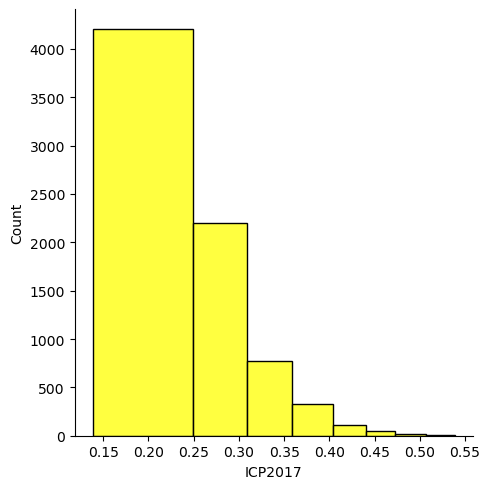

In [50]:
sea.displot(datadistaciasmap.ICP2017, bins=HT_bins,color='yellow')

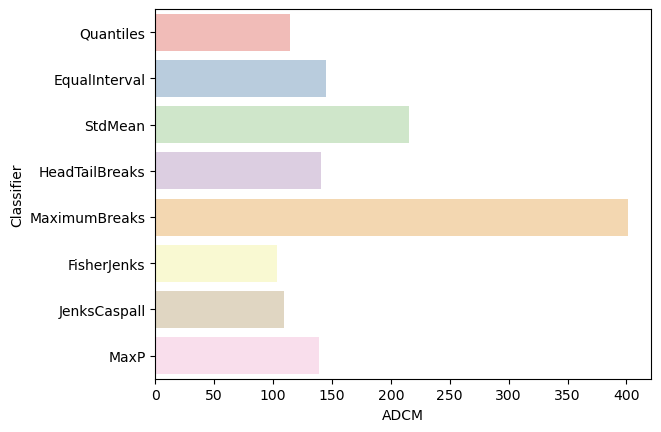

In [51]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5

# Recolectamos ADCM para cada clasificador
fits = np.array([ c.adcm for c in class5])

# Conviertimos las puntuaciones de ADCM en un DataFrame
adcms = pd.DataFrame(fits)

# Agregamos nombres de clasificadores
adcms['classifier'] = [c.name for c in class5]

# Agregamos nombres de columna al ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(y='Classifier', x='ADCM', data=adcms, palette='Pastel1')

In [52]:
datadistaciasmap['QU'] = q5.yb 
datadistaciasmap['FJ'] = fj5.yb
datadistaciasmap['JC'] = jc5.yb
datadistaciasmap['EI'] = ei5.yb

In [53]:
# Casos por esquema:

class5new = q5, fj5, jc5, ei5
pd.DataFrame({c.name: c.counts for c in class5new}, index=['Class-{}'.format(i) for i in range(5)])

,Quantiles,FisherJenks,JenksCaspall,EqualInterval
Class-0,1544,1968,1358,3008
Class-1,1562,2124,1650,3004
Class-2,1511,1892,1575,1291
Class-3,1544,1216,2011,355
Class-4,1531,492,1098,34


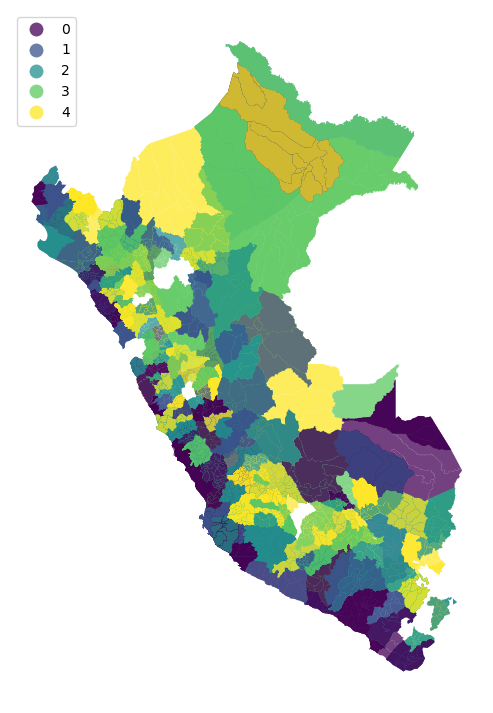

In [60]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))

datadistaciasmap.plot(column='QU', 
                      cmap='viridis', 
                      categorical=True,
                      edgecolor='white', 
                      linewidth=0., 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax
                      )

ax.set_axis_off()

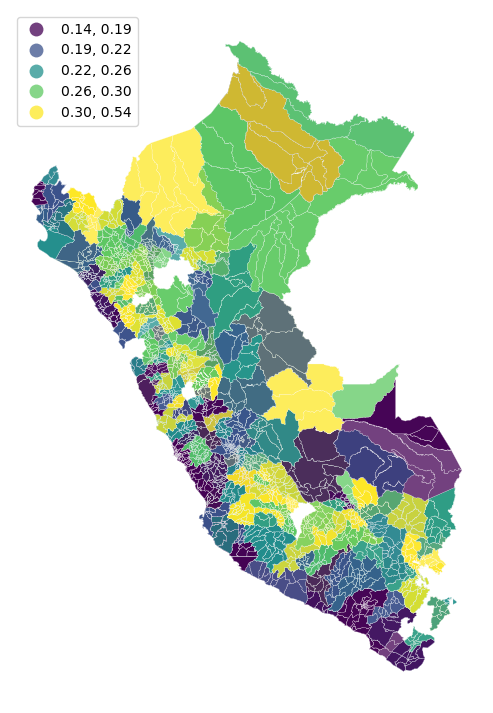

In [61]:
# para el esquema de: Quantiles --> Distribuir los datos de manera equitativa en diferentes categorías

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))

datadistaciasmap.plot(column='ICP2017', 
                      cmap='viridis',       
                      scheme='Quantiles',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax
                      )

ax.set_axis_off()

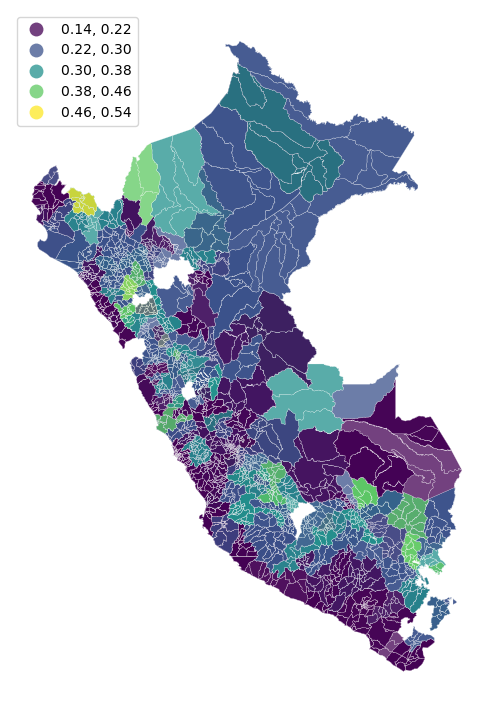

In [62]:
# para el esquema de: EqualInterval --> Tener intervalos de ancho uniforme

f, ax = plt.subplots(1, figsize=(9, 9))

datadistaciasmap.plot(column='ICP2017', 
                      cmap='viridis',       
                      scheme='EqualInterval',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax
                      )

ax.set_axis_off()

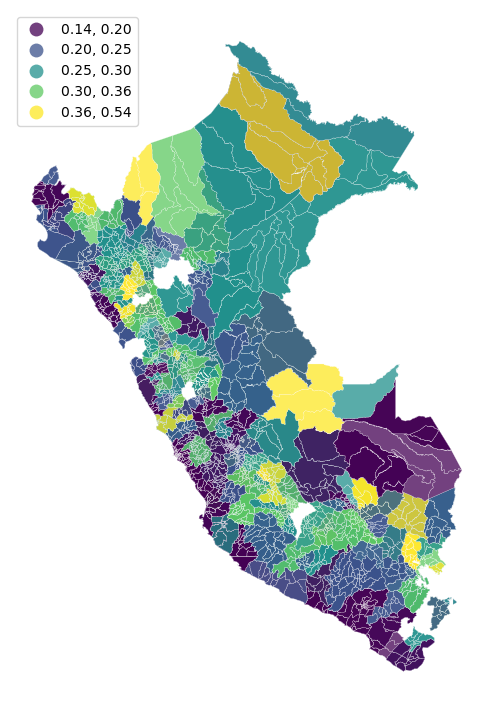

In [63]:
# para el esquema de: FisherJenks --> Maximizar la diferenciación entre los grupos

f, ax = plt.subplots(1, figsize=(9, 9))

datadistaciasmap.plot(column='ICP2017', 
                      cmap='viridis',       
                      scheme='FisherJenks',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax
                      )

ax.set_axis_off()

In [64]:
# cargamos todo lo obtenido del ejercicio N°2 en el geopackage: "dataMapasPeru"
datadistaciasmap.to_file(os.path.join('maps',"dataMapasPeru.gpkg"), layer='provincias', driver="GPKG")

In [65]:
# EJERCICIO N°3:

In [66]:
# seleccionamos 3 variables numéricas de nuestro mapa mergeado
seleccionIndicadores = ['Educ_Sup_incomp2019_pct',
                        'NB_comp2017_pct',
                        'Viv_Sin_ap2017_pct']

datadistaciasmap[seleccionIndicadores].describe()

,Educ_Sup_incomp2019_pct,NB_comp2017_pct,Viv_Sin_ap2017_pct
count,7692.000000,7692.000000,7692.000000
mean,42.656196,64.740393,16.357449
std,16.382730,18.301791,15.924538
min,12.132731,4.200000,0.700000
25%,29.978115,53.500000,4.300000
50%,41.411603,68.300000,11.100000
75%,53.573528,77.900000,23.400000
max,88.025567,98.800000,95.400000


<Axes: >

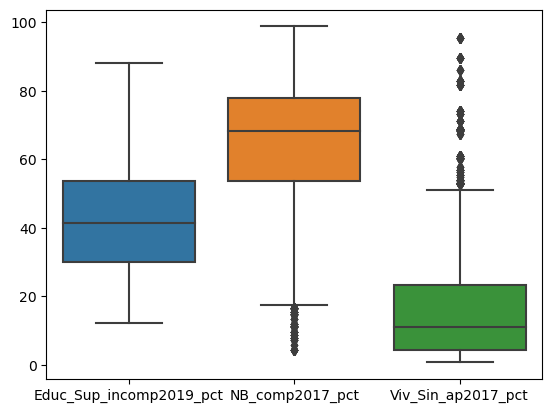

In [67]:
# realizamos un gráfico de diagrama de caja de la columna "seleccionIndicadores" del df "datadistaciasmap"
sea.boxplot(datadistaciasmap[seleccionIndicadores])

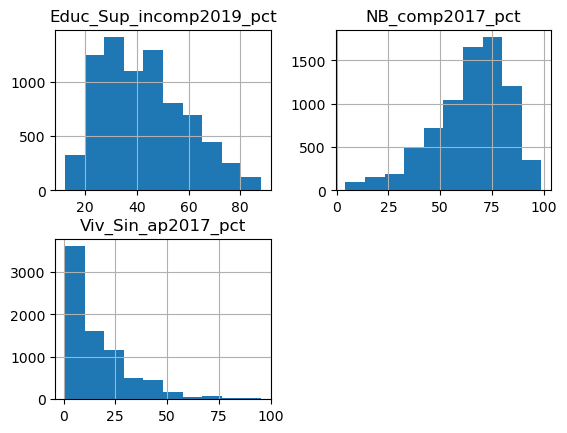

In [68]:
# realizamos un histograma de los indicadores seleccionados:
datadistaciasmap[seleccionIndicadores].hist();

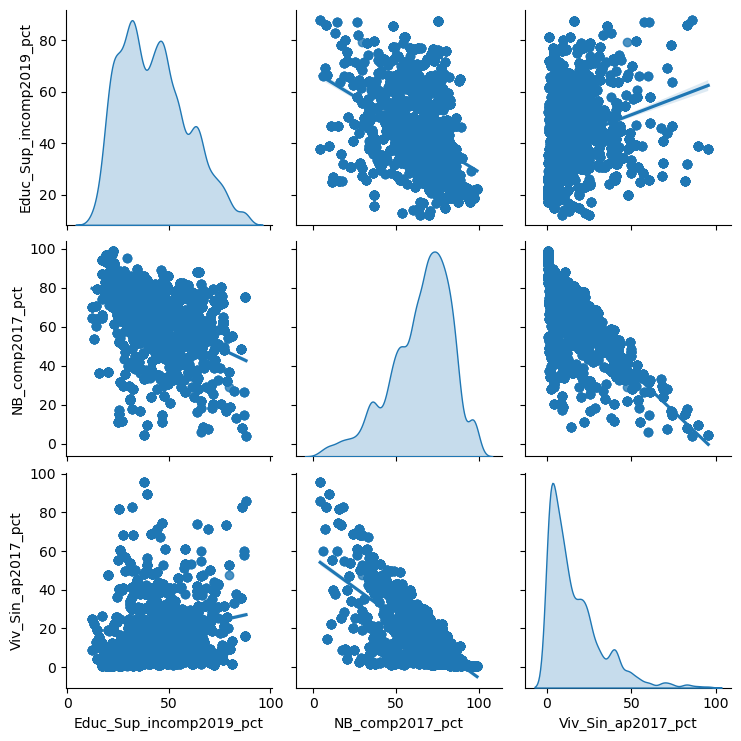

In [69]:
# realizamos un gráfico de pares de los indicadores seleccionados:
sea.pairplot(datadistaciasmap[seleccionIndicadores], kind="reg", diag_kind="kde")

<Axes: >

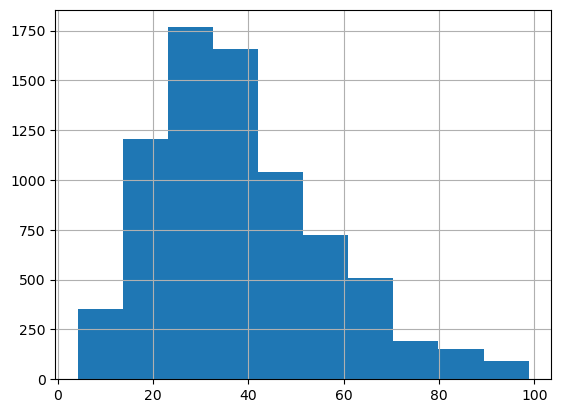

In [71]:
reverse=lambda x:abs(x-x.max())+x.min()

datadistaciasmap['NB_incomp2017_pct'] = reverse(datadistaciasmap['NB_comp2017_pct'])
datadistaciasmap['NB_incomp2017_pct'].hist()

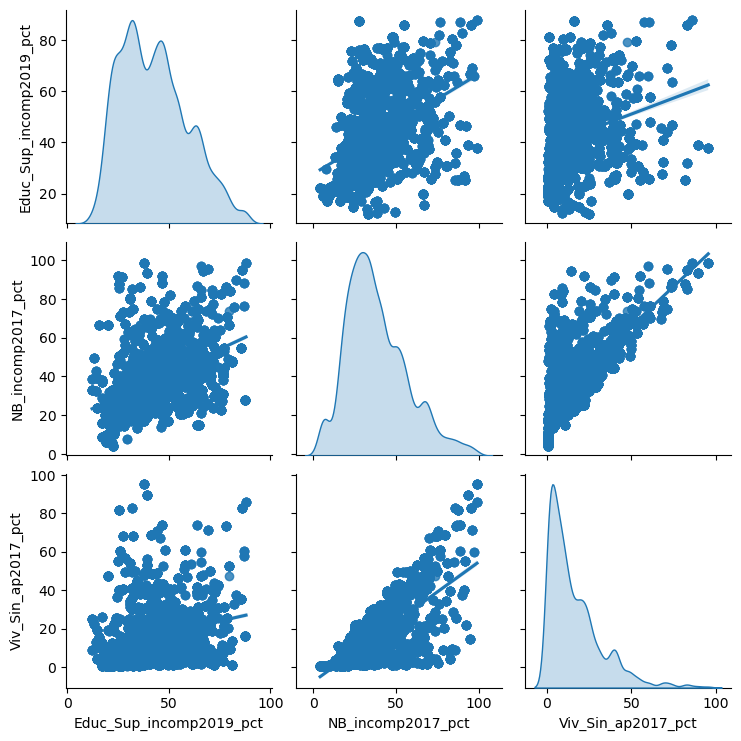

In [72]:
# ahora todos son o "incompletos" o "sin"
seleccionIndicadores_Nuevo = ['Educ_Sup_incomp2019_pct',
                              'NB_incomp2017_pct',
                              'Viv_Sin_ap2017_pct']

sea.pairplot(datadistaciasmap[seleccionIndicadores_Nuevo], kind="reg", diag_kind="kde")

In [73]:
columnasEscala = seleccionIndicadores_Nuevo

from sklearn.preprocessing import robust_scale as rs
from sklearn.preprocessing import power_transform as pt
from sklearn.preprocessing import quantile_transform as qt

rs_result = rs(datadistaciasmap[columnasEscala])
pt_result = pt(datadistaciasmap[columnasEscala])
qt_result = qt(datadistaciasmap[columnasEscala])

<Axes: >

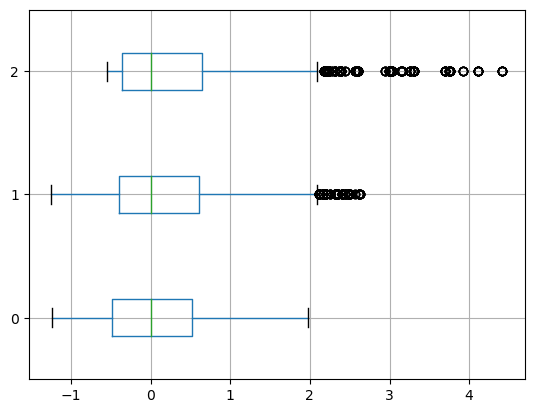

In [74]:
# observamos el "rs_result"
pd.DataFrame(rs_result).boxplot(vert=False)

<Axes: >

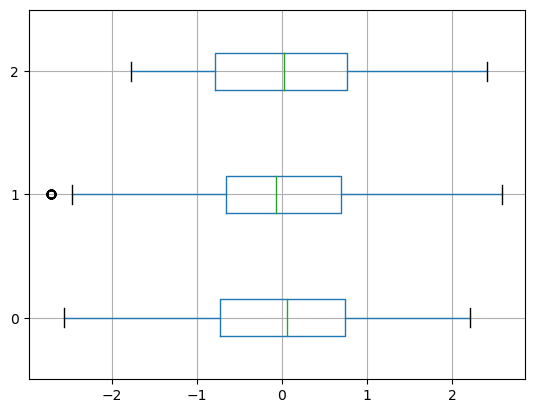

In [75]:
# observamos el "pt_result"
pd.DataFrame(pt_result).boxplot(vert=False)

<Axes: >

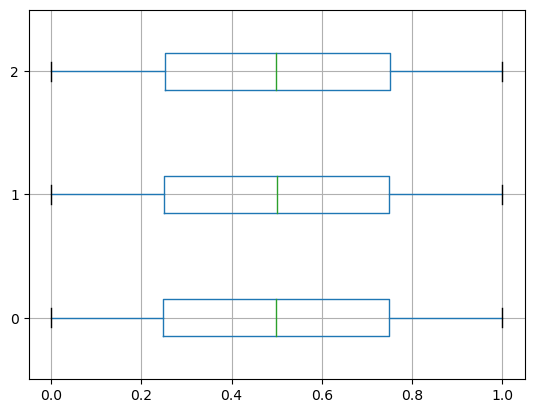

In [76]:
# observamos el "qt_result"
pd.DataFrame(qt_result).boxplot(vert=False)

In [77]:
# nuevos nombres
seleccionIndicadores_Nuevo_t = [s+'_t' for s in seleccionIndicadores_Nuevo ]

# agregamos columnas
datadistaciasmap[seleccionIndicadores_Nuevo_t] = qt_result

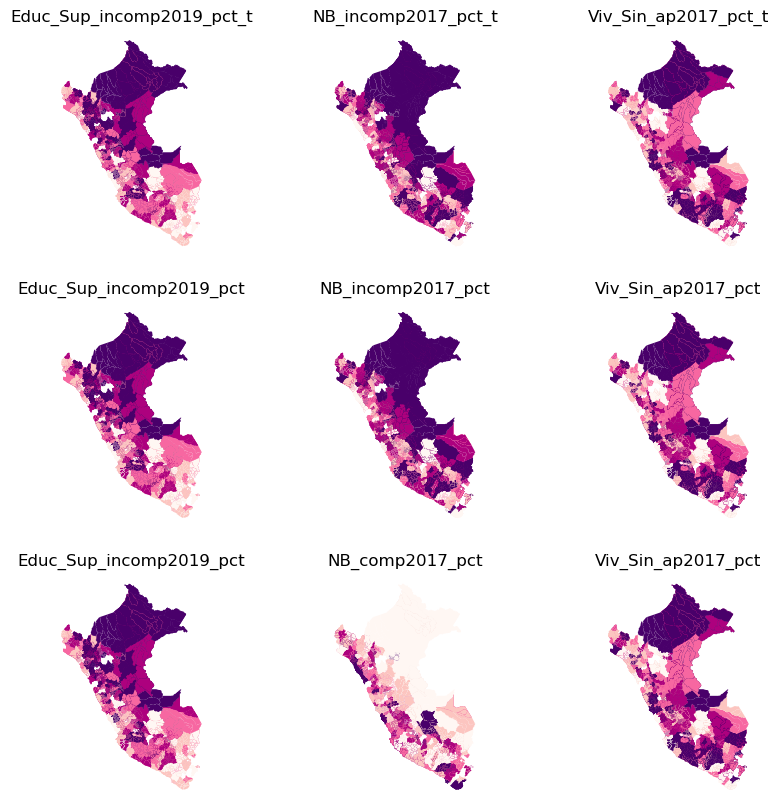

In [78]:
f, axs = plt.subplots( ncols=3, nrows=3,figsize=(10, 10))
axs = axs.flatten()

# Iniciamos un ciclo iterativo sobre nuestros 3 indicadores seleccionados
for i, col in enumerate(seleccionIndicadores_Nuevo_t + seleccionIndicadores_Nuevo + seleccionIndicadores):
    
    # select the axis where the map will go
    ax = axs[i]
    
    # Plot the map
    datadistaciasmap.plot(column=col,
                    ax=ax,
                    scheme="Quantiles",
                    linewidth=0,
                    cmap="RdPu",
                    )
    
    # Remove axis clutter
    ax.set_axis_off()
    
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    
# Display the figure
plt.show()

In [80]:
# actualizamos nuestro geopackage "dataMapPeru"
datadistaciasmap.to_file(os.path.join('maps',"dataMapPeru.gpkg"), layer='distritos', driver="GPKG")

In [81]:
# EJERCICIO N°4:

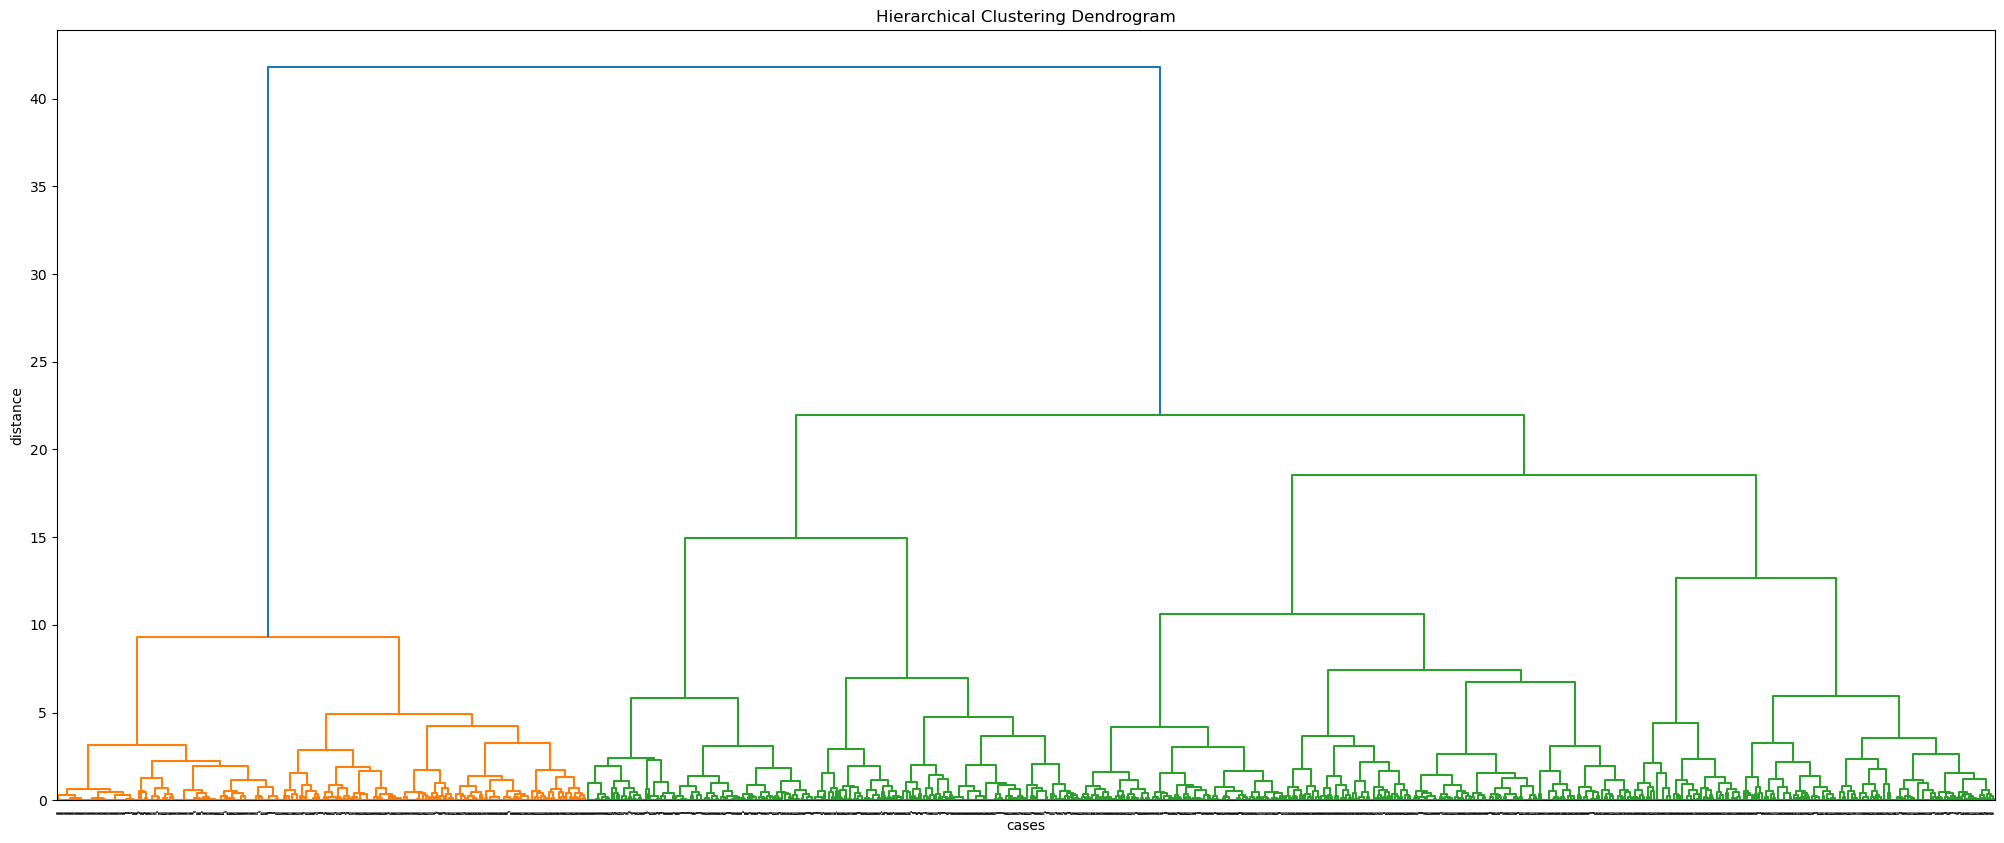

In [82]:
from scipy.cluster import hierarchy as hc

Z = hc.linkage(qt_result, 'ward')

# calculamos el dendrograma completo:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram') # Dendograma de agrupamiento jerárquico
plt.xlabel('cases')
plt.ylabel('distance')

hc.dendrogram(Z, leaf_rotation=90., leaf_font_size=1,)

plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering as agnes

# para asegurarnos que los resultados sean consistentes:
np.random.seed(12345)

# inicializamos el algoritmo, solicitando 3 clústeres
model = agnes(linkage="ward", n_clusters=3).fit(datadistaciasmap[seleccionIndicadores_Nuevo_t])

# asignamos etiquetas a la tabla de datos principal
datadistaciasmap["hc_3"] = model.labels_

In [88]:
datadistaciasmap["hc_3"].value_counts()

hc_3
0    3625
1    2108
2    1959
Name: count, dtype: int64

In [89]:
datadistaciasmap.groupby("hc_3")[seleccionIndicadores_Nuevo].mean()

,Educ_Sup_incomp2019_pct,NB_incomp2017_pct,Viv_Sin_ap2017_pct
hc_3,,,
0,56.770677,43.684662,17.454759
1,26.375414,20.285199,3.499336
2,34.057369,47.562430,28.163042


In [86]:
# Index db en cluster ID
datadistaciasmap_long = datadistaciasmap.set_index("hc_3").copy()

# mantenemos solo las variables utilizadas para la agrupación
datadistaciasmap_long = datadistaciasmap_long[seleccionIndicadores_Nuevo]

# apilamos los nombres de las columnas en una columna, obteniendo una versión "long" del conjunto de datos
datadistaciasmap_long = datadistaciasmap_long.stack()

# llevamos los índices a las columnas adecuadas
datadistaciasmap_long = datadistaciasmap_long.reset_index()

# renombramos los nombres de las columnas
datadistaciasmap_long = datadistaciasmap_long.rename(columns={"level_1": "Attribute", 0: "Values"})

# veos finalmente el resultado
datadistaciasmap_long.head()

,hc_3,Attribute,Values
0,1,Educ_Sup_incomp2019_pct,24.463493
1,1,NB_incomp2017_pct,18.100000
2,1,Viv_Sin_ap2017_pct,2.800000
3,1,Educ_Sup_incomp2019_pct,22.170283
4,1,NB_incomp2017_pct,18.900000


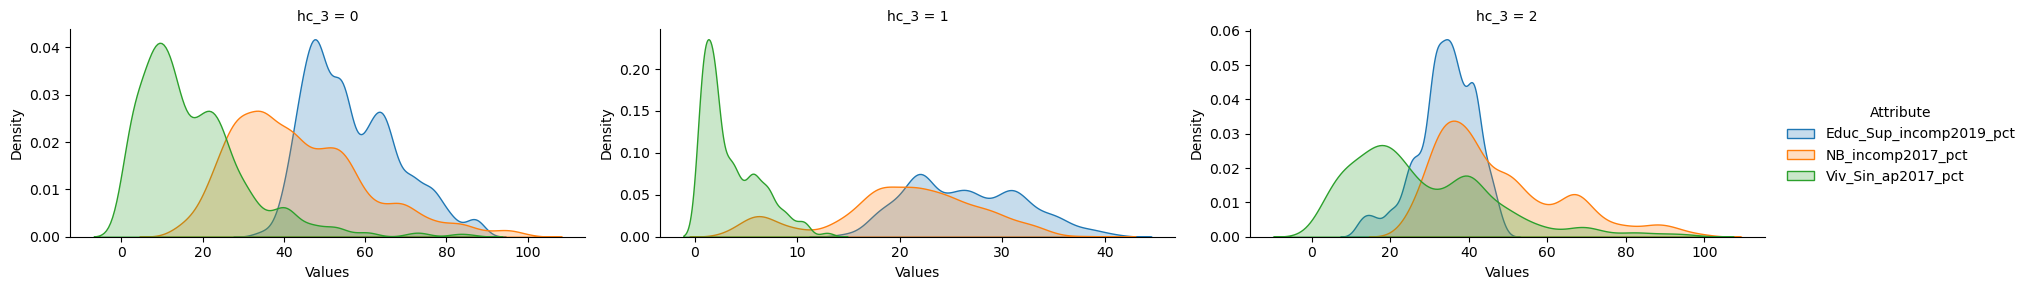

In [90]:
# Configurar las facetas
facets = sea.FacetGrid(
         data=datadistaciasmap_long,
         col="hc_3",
         hue="Attribute",
         sharey=False,
         sharex=False,
         aspect=2,
         col_wrap=3,
         )

# construimos el plot como un "sns.kdeplot"
facets.map(sea.kdeplot, "Values", fill=True).add_legend()

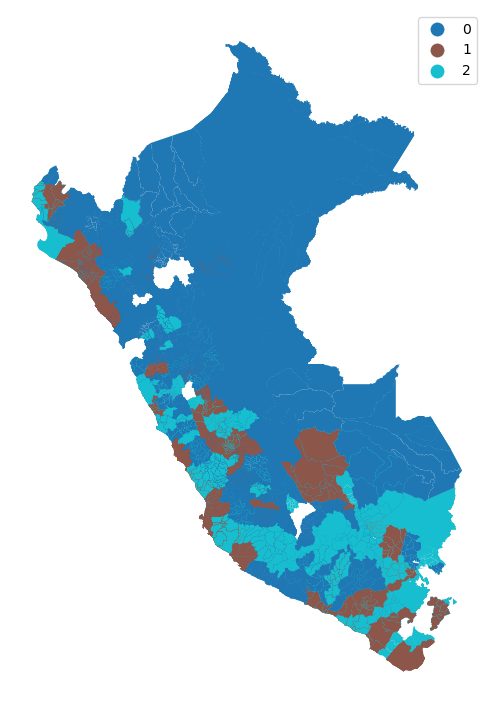

In [91]:
# configuramos la figura y el ax
f, ax = plt.subplots(1, figsize=(9, 9))

# trazamos coropletas de valores únicos incluyendo una leyenda y sin líneas de límite
datadistaciasmap.plot(column="hc_3", categorical=True, legend=True, linewidth=0, ax=ax)

# quitamos el eje
ax.set_axis_off()

# mostramos el mapa
plt.show()

In [92]:
# EJERCICIO N°5:

In [94]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(datadistaciasmap)

In [95]:
# rook
w_queen = Queen.from_dataframe(datadistaciasmap)

In [97]:
# "k" vecinos más cercanos
w_knn = KNN.from_dataframe(datadistaciasmap, k=4)

In [98]:
# el primero:
datadistaciasmap.head(1)

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,depProv,Ubigeo,Poblacion,ICP2017,Educ_Sup_incomp2019_pct,NB_comp2017_pct,Viv_Sin_ap2017_pct,QU,FJ,JC,EI,NB_incomp2017_pct,Educ_Sup_incomp2019_pct_t,NB_incomp2017_pct_t,Viv_Sin_ap2017_pct_t,hc_3
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+TACNA,230102,40652,0.181971,24.463493,84.9,2.8,0,0,0,0,18.1,0.139139,0.097097,0.186186,1


In [99]:
# cantidad de vecinos de la provincia
w_rook.neighbors[0]

[1, 2, 3, 12, 13, 14, 15]

<Axes: >

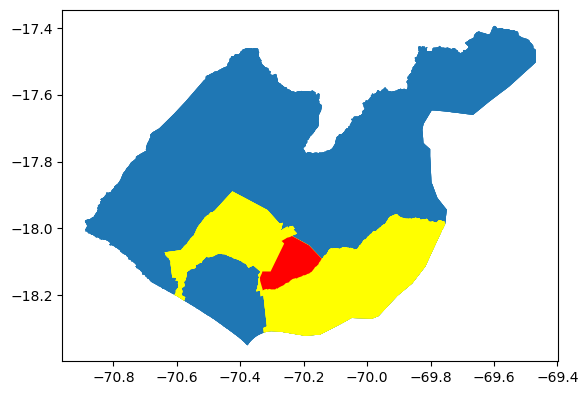

In [101]:
# para el primer vecindario:
base = datadistaciasmap[datadistaciasmap.PROVINCIA=="TACNA"].plot()

datadistaciasmap.iloc[w_rook.neighbors[0] ,].plot(ax=base,facecolor="yellow")
datadistaciasmap.head(1).plot(ax=base,facecolor="red")

In [103]:
w_queen.neighbors[0]

[1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15]

<Axes: >

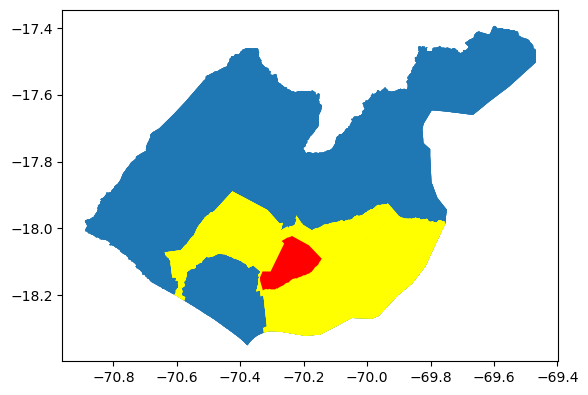

In [104]:
# para el segundo vecindario:
base = datadistaciasmap[datadistaciasmap.PROVINCIA=="TACNA"].plot()

datadistaciasmap.iloc[w_queen.neighbors[0] ,].plot(ax=base,facecolor="yellow")
datadistaciasmap.head(1).plot(ax=base,facecolor="red")

In [105]:
w_knn.neighbors[0]

[3, 2, 1, 15]

<Axes: >

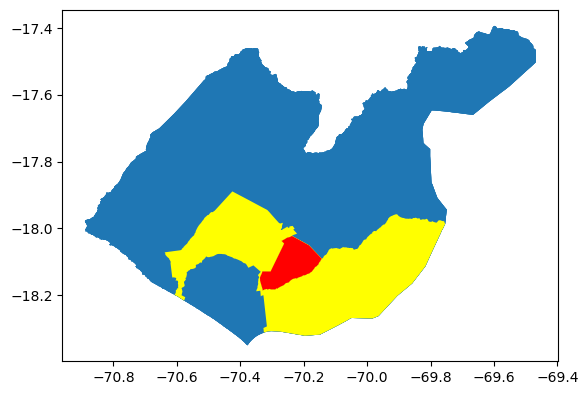

In [106]:
# para el tercer vecindario:
base=datadistaciasmap[datadistaciasmap.PROVINCIA=="TACNA"].plot()

datadistaciasmap.iloc[w_knn.neighbors[0],].plot(ax=base,facecolor="yellow")
datadistaciasmap.head(1).plot(ax=base,facecolor="red")

In [107]:
# todos los vecinos por filas:
w_knn.neighbors

{0: [3, 2, 1, 15],
 1: [3, 2, 0, 15],
 2: [3, 0, 1, 15],
 3: [2, 0, 1, 15],
 4: [7, 6, 5, 10],
 5: [7, 6, 4, 10],
 6: [7, 4, 5, 10],
 7: [6, 4, 5, 10],
 8: [9, 10, 11, 4],
 9: [10, 8, 11, 4],
 10: [9, 8, 11, 4],
 11: [9, 10, 8, 4],
 12: [14, 13, 15, 2],
 13: [14, 15, 12, 2],
 14: [13, 15, 12, 2],
 15: [14, 13, 12, 2],
 16: [18, 19, 17, 44],
 17: [18, 19, 16, 44],
 18: [19, 17, 16, 44],
 19: [18, 17, 16, 44],
 20: [21, 22, 23, 26],
 21: [22, 20, 23, 26],
 22: [21, 20, 23, 26],
 23: [21, 22, 20, 26],
 24: [25, 26, 27, 20],
 25: [26, 27, 24, 20],
 26: [25, 27, 24, 20],
 27: [25, 26, 24, 20],
 28: [31, 29, 30, 59],
 29: [31, 28, 30, 59],
 30: [31, 28, 29, 59],
 31: [28, 29, 30, 59],
 32: [34, 33, 35, 25],
 33: [34, 32, 35, 25],
 34: [33, 32, 35, 25],
 35: [34, 33, 32, 25],
 36: [37, 39, 38, 61],
 37: [36, 39, 38, 61],
 38: [36, 37, 39, 61],
 39: [36, 37, 38, 61],
 40: [43, 41, 42, 3],
 41: [40, 43, 42, 3],
 42: [40, 43, 41, 3],
 43: [40, 41, 42, 3],
 44: [45, 47, 48, 49],
 45: [46, 44, 34,

In [108]:
# la matriz de barrio:

# 1 significa que ambos son vecinos
pd.DataFrame(*w_knn.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [109]:
# cuenta de ceros
w_knn.nonzero

30768

In [110]:
# porcentaje de barrio: densidad
w_knn.pct_nonzero

0.052002080083203325

In [111]:
# ¿una provincia sin vecino?
w_knn.islands

[]

In [121]:
# EJERCICIO N°6:

In [122]:
# necesario para la correlación espacial
w_knn.transform = 'R'

In [123]:
from esda.moran import Moran

# calculo del coeficiente de Moran para el indicador: ICP2017
moranICP = Moran(datadistaciasmap['ICP2017'], w_knn)
moranICP.I,moranICP.p_sim

(0.5887345116086183, 0.001)

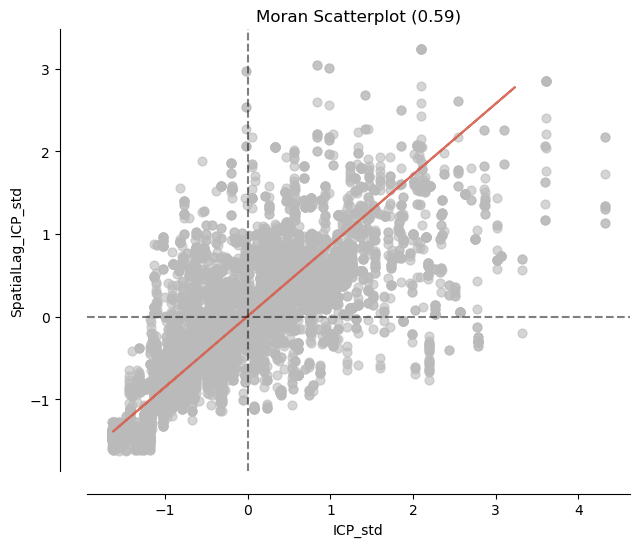

In [124]:
from splot.esda import moran_scatterplot

# diagrama de dispersión para el indicador: ICP2017
fig, ax = moran_scatterplot(moranICP, aspect_equal=True)
ax.set_xlabel('ICP_std')
ax.set_ylabel('SpatialLag_ICP_std')
plt.show()

In [125]:
# calculo del coeficiente de Moran para el indicador: Educ_Sup_incomp2019_pct
moranESI = Moran(datadistaciasmap['Educ_Sup_incomp2019_pct'], w_knn)
moranESI.I,moranESI.p_sim

(0.5254164565260917, 0.001)

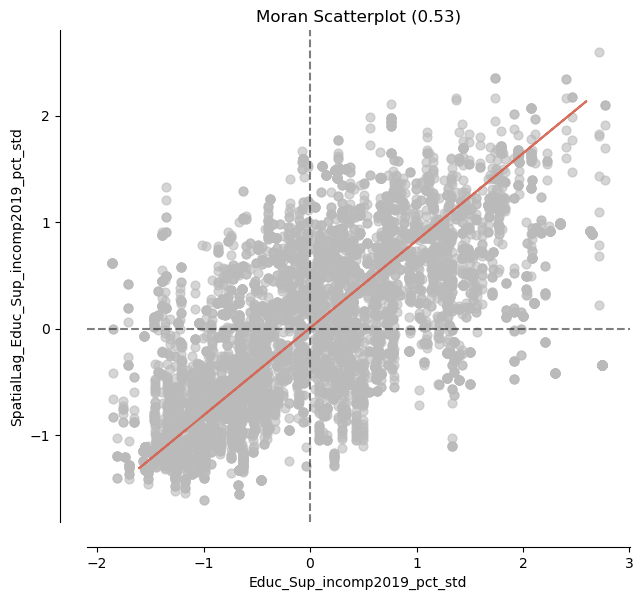

In [127]:
# diagrama de dispersión para el indicador: Educ_Sup_incomp2019_pct
fig, ax = moran_scatterplot(moranESI, aspect_equal=True)
ax.set_xlabel('Educ_Sup_incomp2019_pct_std')
ax.set_ylabel('SpatialLag_Educ_Sup_incomp2019_pct_std')
plt.show()

In [128]:
# calculo del coeficiente de Moran para el indicador: NB_comp2017_pct
moranNBC = Moran(datadistaciasmap['NB_comp2017_pct'], w_knn)
moranNBC.I,moranNBC.p_sim

(0.530871484867973, 0.001)

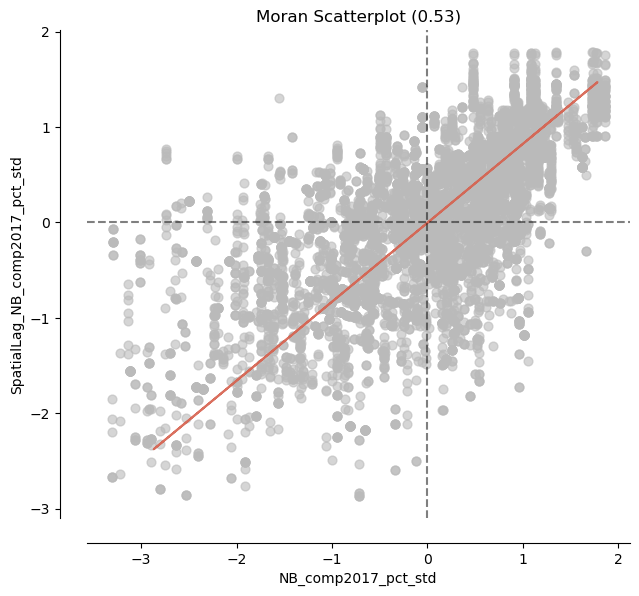

In [129]:
# diagrama de dispersión para el indicador: NB_comp2017_pct
fig, ax = moran_scatterplot(moranNBC, aspect_equal=True)
ax.set_xlabel('NB_comp2017_pct_std')
ax.set_ylabel('SpatialLag_NB_comp2017_pct_std')
plt.show()

In [130]:
# calculo del coeficiente de Moran para el indicador: Viv_Sin_ap2017_pct
moranVSAP = Moran(datadistaciasmap['Viv_Sin_ap2017_pct'], w_knn)
moranVSAP.I,moranVSAP.p_sim

(0.44286257894766434, 0.001)

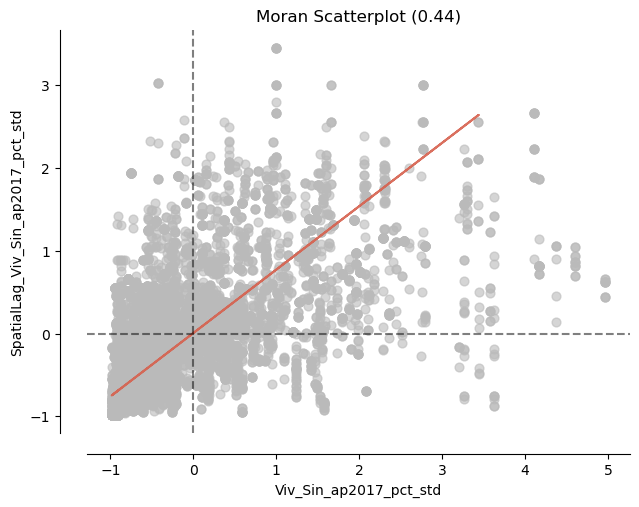

In [131]:
# diagrama de dispersión para el indicador: Viv_Sin_ap2017_pct
fig, ax = moran_scatterplot(moranVSAP, aspect_equal=True)
ax.set_xlabel('Viv_Sin_ap2017_pct_std')
ax.set_ylabel('SpatialLag_Viv_Sin_ap2017_pct_std')
plt.show()

In [132]:
# EJERCICIO N°7:

In [135]:
# el diagrama de dispersión con información local:
from esda.moran import Moran_Local

# observamos las correlaciones espaciales de "ICP2017" y "Educ_Sup_incomp2019_pct":

# correlación espacial de ICP: 0.530871484867973, Valor p: 0.001
# correlación espacial de ESI: 0.5254164565260917, Valor p: 0.001
# correlación espacial de ICP > correlación espacial de ESI

# nos quedamos con el indicador "Educ_Sup_incomp2019_pct_std"

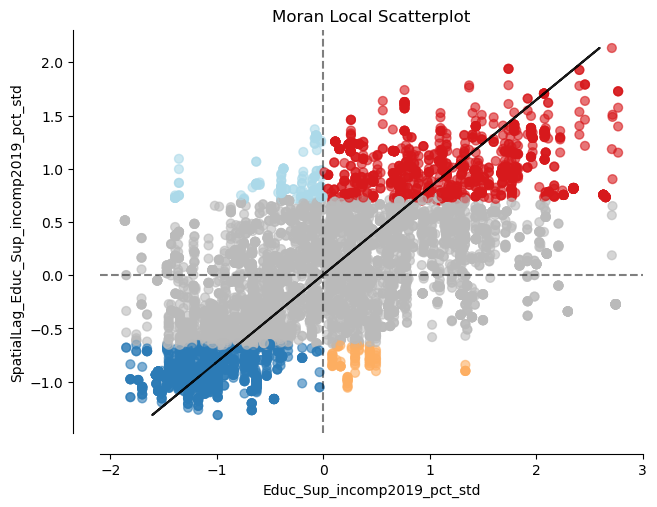

In [136]:
# calculamos el "Moran_Local" de nuestro indicador con correlación espacial mayor "Educ_Sup_incomp2019_pct" y trazamos:
lisaESI = Moran_Local(y=datadistaciasmap['Educ_Sup_incomp2019_pct'], w=w_knn, seed=2022)
fig, ax = moran_scatterplot(lisaESI, p=0.05)

# nombres de los ejes:
ax.set_xlabel('Educ_Sup_incomp2019_pct_std')
ax.set_ylabel('SpatialLag_Educ_Sup_incomp2019_pct_std')

plt.show()

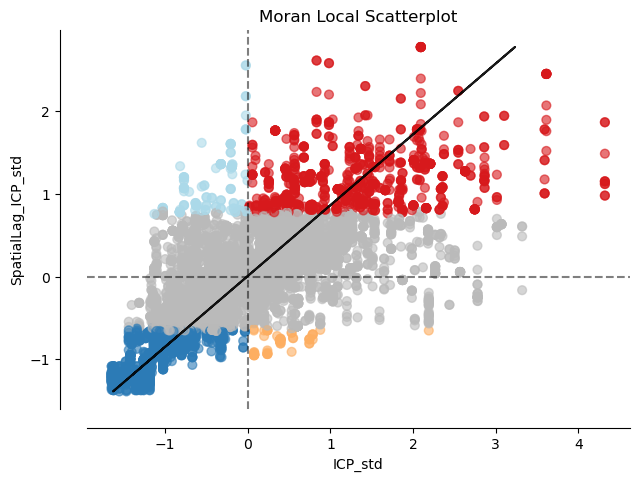

In [137]:
# calculamos el "Moran_Local" de nuestro indicador "ICP2017" y trazamos:
lisaICP = Moran_Local(y=datadistaciasmap['ICP2017'], w=w_knn, seed=2022)
fig, ax = moran_scatterplot(lisaICP, p=0.05)

# nombres de los ejes:
ax.set_xlabel('ICP_std')
ax.set_ylabel('SpatialLag_ICP_std')

plt.show()

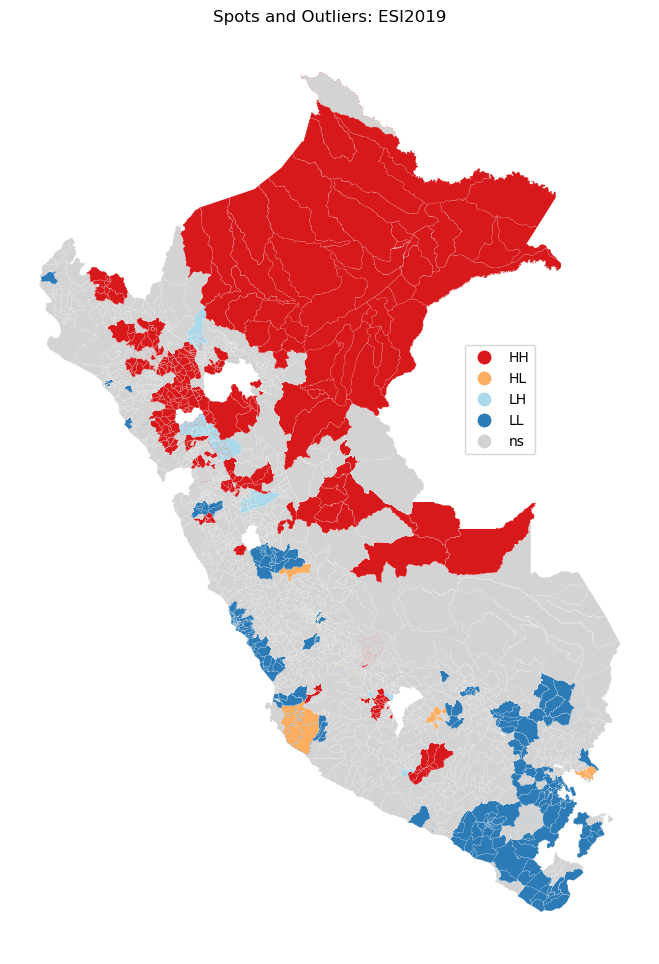

In [139]:
from splot.esda import lisa_cluster

# el mapa con los puntos y los valores atípicos:
f, ax = plt.subplots(1, figsize=(12, 12))

plt.title('Spots and Outliers: ESI2019')

fig = lisa_cluster(lisaESI, datadistaciasmap,ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (0.7, 0.6)})
plt.show()

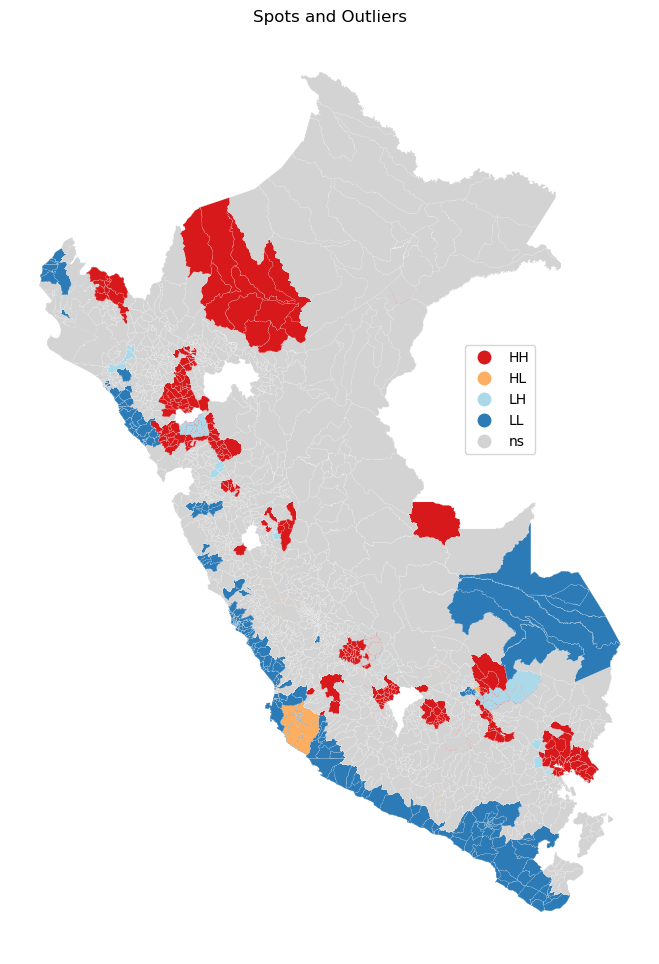

In [138]:
from splot.esda import lisa_cluster

# el mapa con los puntos y los valores atípicos:
f, ax = plt.subplots(1, figsize=(12, 12))

plt.title('Spots and Outliers: ICP2017')

fig = lisa_cluster(lisaICP, datadistaciasmap,ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (0.7, 0.6)})
plt.show()

In [140]:
# cuadrante
lisaESI.q

array([3, 3, 3, ..., 3, 3, 3])

In [141]:
# significancia:
lisaESI.p_sim

array([0.016, 0.018, 0.016, ..., 0.002, 0.002, 0.007])

In [143]:
# cuadrante: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaESI.q).value_counts()

3    2980
1    2652
2    1115
4     945
Name: count, dtype: int64

In [144]:
datadistaciasmap['Educ_Sup_incomp2019_pct_quadrant'] = [l if p <0.05 else 0 for l,p in zip(lisaESI.q, lisaESI.p_sim)]
datadistaciasmap['Educ_Sup_incomp2019_pct_quadrant'].value_counts()

Educ_Sup_incomp2019_pct_quadrant
0    5004
3    1334
1    1114
2     148
4      92
Name: count, dtype: int64

In [145]:
# creamos una lista para clasificar los diferentes patrones espaciales identificados mediante el análisis de "Moran_Local"
labels = ['0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

datadistaciasmap['Educ_Sup_incomp2019_pct_quadrant_names'] = [labels[i] for i in datadistaciasmap['Educ_Sup_incomp2019_pct_quadrant']]
datadistaciasmap['Educ_Sup_incomp2019_pct_quadrant_names'].value_counts()

Educ_Sup_incomp2019_pct_quadrant_names
0 no_sig         5004
3 coldSpot       1334
1 hotSpot        1114
2 coldOutlier     148
4 hotOutlier       92
Name: count, dtype: int64

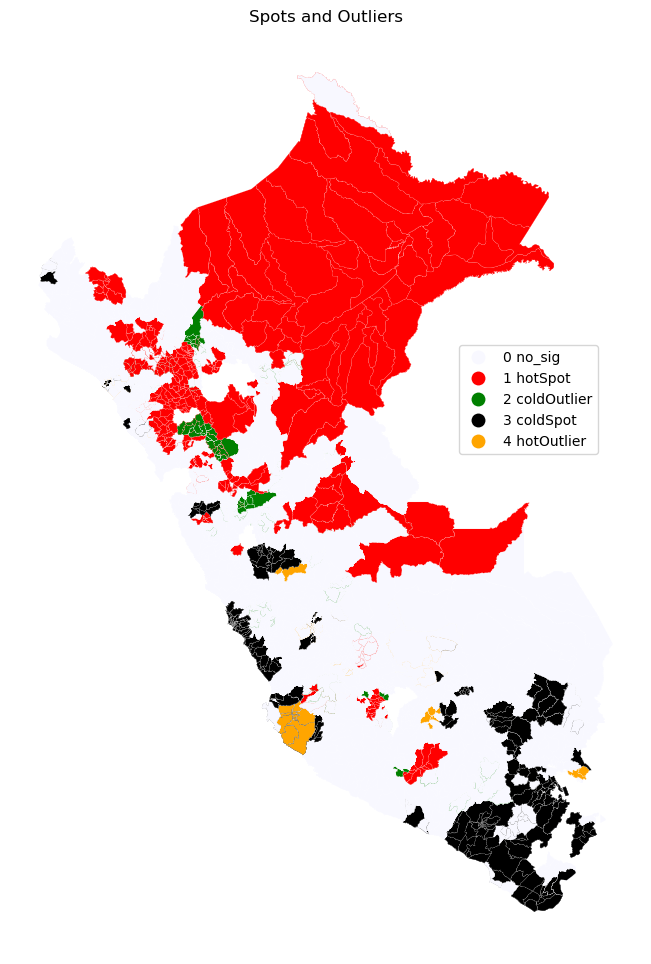

In [146]:
from matplotlib import colors

myColorMap = colors.ListedColormap(['ghostwhite', 'red', 'green', 'black','orange'])

# configuramos la figura y el ax
f, ax = plt.subplots(1, figsize=(12,12))

# titulo de nuestro mapa
plt.title('Spots and Outliers')

# trazamos coropletas de valores únicos incluyendo una leyenda y sin líneas de límite
datadistaciasmap.plot(column='Educ_Sup_incomp2019_pct_quadrant_names', 
                      categorical=True,
                      cmap=myColorMap,
                      linewidth=0.1, 
                      edgecolor='white',
                      legend=True,
                      legend_kwds={'loc': 'center left', 'bbox_to_anchor': (0.7, 0.6)},
                      ax=ax)

# eliminamos "axis"
ax.set_axis_off()

# ostramos el mapa final
plt.show()

In [147]:
# última actualización a nuestro geopackage:
datadistaciasmap.to_file(os.path.join('maps',"dataMapPeru.gpkg"), layer='distritos', driver="GPKG")